In [1]:
import pandas as pd

In [2]:
matches = pd.read_csv("matches.csv", index_col=0)

In [5]:
38*20*7 #expected rows 

5320

In [6]:
matches.shape

(5320, 27)

In [7]:
matches["team"].value_counts()

team
Manchester City             266
Manchester United           266
Arsenal                     266
Everton                     266
Crystal Palace              266
West Ham United             266
Brighton and Hove Albion    266
Newcastle United            266
Chelsea                     266
Tottenham Hotspur           266
Liverpool                   266
Leicester City              228
Wolverhampton Wanderers     228
Southampton                 228
Burnley                     228
Bournemouth                 190
Aston Villa                 190
Fulham                      152
Watford                     152
Leeds United                114
Brentford                   114
Sheffield United            114
Nottingham Forest            76
Norwich City                 76
West Bromwich Albion         76
Huddersfield Town            76
Luton Town                   38
Cardiff City                 38
Swansea City                 38
Stoke City                   38
Name: count, dtype: int64

In [11]:
matches.dtypes #recall from fastAi that ML models can't consume objects

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf                int64
ga                int64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

In [12]:
matches["date"] = pd.to_datetime(matches["date"])

In [15]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes

In [17]:
matches["opp_code"] = matches["opponent"].astype("category").cat.codes

In [22]:
matches["hour"] = matches["time"].str.replace(":.+","", regex=True).astype("int")

In [24]:
matches["day_code"] = matches["date"].dt.day_of_week

In [31]:
matches["target"] = (matches["result"] == "W").astype("int")

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [54]:
train = matches[matches["date"] < '2023-01-01']

In [60]:
test = matches[matches["date"] > '2023-01-01']

In [61]:
predictors = ["venue_code","opp_code","hour","day_code"]

In [62]:
rf.fit(train[predictors],train["target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [63]:
preds = rf.predict(test[predictors])

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
acc = accuracy_score(test["target"],preds)

In [66]:
acc

0.5951178451178452

In [67]:
combined = pd.DataFrame(dict(actual=test["target"], prediction=preds))

In [68]:
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,557,168
1,313,150


In [69]:
from sklearn.metrics import precision_score 

In [83]:
precision_score(test["target"], preds)

0.4716981132075472

In [84]:
grouped_matches = matches.groupby("team")

In [89]:
def rolling_averages(group,cols,new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3,closed="left").mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [90]:
cols = ["gf","ga","sh","sot","dist","fk","pk","pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

In [91]:
group = grouped_matches.get_group("Manchester City").sort_values("date")

In [92]:
rolling_averages(group, cols, new_cols)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
3,2017-09-09,12:30,Premier League,Matchweek 4,Sat,Home,W,5,0,Liverpool,...,5,1,1.666667,0.666667,17.333333,6.000000,18.566667,1.333333,0.000000,0.000000
5,2017-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,6,0,Watford,...,5,1,2.666667,0.666667,17.000000,8.000000,16.733333,0.666667,0.000000,0.000000
7,2017-09-23,15:00,Premier League,Matchweek 6,Sat,Home,W,5,0,Crystal Palace,...,5,1,4.333333,0.333333,19.666667,9.000000,15.800000,0.333333,0.333333,0.333333
9,2017-09-30,17:30,Premier League,Matchweek 7,Sat,Away,W,1,0,Chelsea,...,5,1,5.333333,0.000000,21.666667,9.333333,14.900000,0.000000,0.333333,0.333333
10,2017-10-14,15:00,Premier League,Matchweek 8,Sat,Home,W,7,2,Stoke City,...,5,1,4.000000,0.000000,23.000000,7.666667,16.233333,0.333333,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,2024-04-28,16:30,Premier League,Matchweek 35,Sun,Away,W,2,0,Nott'ham Forest,...,6,1,4.333333,1.000000,22.666667,8.666667,16.666667,0.333333,0.333333,0.333333
52,2024-05-04,17:30,Premier League,Matchweek 36,Sat,Home,W,5,1,Wolves,...,5,1,3.666667,0.333333,20.333333,7.666667,17.533333,0.666667,0.333333,0.333333
53,2024-05-11,12:30,Premier League,Matchweek 37,Sat,Away,W,4,0,Fulham,...,5,1,3.666667,0.333333,14.333333,7.000000,17.000000,0.666667,0.666667,0.666667
54,2024-05-14,20:00,Premier League,Matchweek 34,Tue,Away,W,2,0,Tottenham,...,1,1,3.666667,0.333333,14.666667,7.666667,17.200000,0.333333,1.000000,1.000000


In [94]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x,cols,new_cols))

In [95]:
matches_rolling

date   time            comp         round  \
team                                                                         
Arsenal                 4  2017-09-09  15:00  Premier League   Matchweek 4   
                        6  2017-09-17  13:30  Premier League   Matchweek 5   
                        8  2017-09-25  20:00  Premier League   Matchweek 6   
                        10 2017-10-01  12:00  Premier League   Matchweek 7   
                        11 2017-10-14  17:30  Premier League   Matchweek 8   
...                               ...    ...             ...           ...   
Wolverhampton Wanderers 40 2024-04-24  19:45  Premier League  Matchweek 29   
                        41 2024-04-27  15:00  Premier League  Matchweek 35   
                        42 2024-05-04  17:30  Premier League  Matchweek 36   
                        43 2024-05-11  15:00  Premier League  Matchweek 37   
                        44 2024-05-19  16:00  Premier League  Matchweek 38   

                            day venue result  gf  ga         opponent  ...  \
team                                                                   ...   
Arsenal                 4   Sat  Home      W   3   0      Bournemouth  ...   
                        6   Sun  Away      D   0   0          Chelsea  ...   
                        8   Mon  Home      W   2   0        West Brom  ...   
                        10  Sun  Home      W   2   0         Brighton  ...   
                        11  Sat  Away      L   1   2          Watford  ...   
...                         ...   ...    ...  ..  ..              ...  ...   
Wolverhampton Wanderers 40  Wed  Home      L   0   1      Bournemouth  ...   
                        41  Sat  Home      W   2   1       Luton Town  ...   
                        42  Sat  Away      L   1   5  Manchester City  ...   
                        43  Sat  Home      L   1   3   Crystal Palace  ...   
                        44  Sun  Away      L   0   2        Liverpool  ...   

                            day_code  target  gf_rolling  ga_rolling  \
team                                                                   
Arsenal                 4          5       1    1.333333    2.666667   
                        6          6       0    1.000000    1.666667   
                        8          0       1    1.000000    1.333333   
                        10         6       1    1.666667    0.000000   
                        11         5       0    1.333333    0.000000   
...                              ...     ...         ...         ...   
Wolverhampton Wanderers 40         2       0    1.000000    2.000000   
                        41         5       1    0.666667    1.666667   
                        42         5       0    0.666667    1.333333   
                        43         5       0    1.000000    2.333333   
                        44         6       0    1.333333    3.000000   

                           sh_rolling sot_rolling dist_rolling fk_rolling  \
team                                                                        
Arsenal                 4   17.666667    5.333333    18.133333   0.000000   
                        6   14.333333    5.000000    16.766667   0.333333   
                        8   12.000000    3.666667    16.566667   0.333333   
                        10  14.333333    5.333333    17.400000   1.333333   
                        11  17.000000    5.000000    18.333333   1.666667   
...                               ...         ...          ...        ...   
Wolverhampton Wanderers 40   9.666667    4.000000    20.533333   0.333333   
                        41  10.333333    3.333333    18.766667   0.000000   
                        42  11.000000    4.000000    19.666667   0.000000   
                        43  10.000000    3.333333    15.966667   0.000000   
                        44   9.666667    4.666667    14.133333   0.000000   

                            pk_rolling  pkatt_rolling  
team    

In [96]:
matches_rolling = matches_rolling.droplevel("team")

In [99]:
matches_rolling.index = range(matches_rolling.shape[0])

In [123]:
def make_predictions(data, predictors):
    train = data[data["date"] < '2023-01-01']
    test = data[data["date"] > '2023-01-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"],predicted=preds), index=test.index)
    precision = precision_score(test["target"], preds)
    acc = accuracy_score(test["target"],preds)
    return combined, precision, acc

In [124]:
combined, precision, acc = make_predictions(matches_rolling, predictors + new_cols)

In [125]:
precision

0.5913312693498453

In [126]:
acc

0.6590717299578059

In [105]:
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)

In [106]:
combined

,actual,predicted,date,team,opponent,result
203,0,1,2023-01-03,Arsenal,Newcastle Utd,D
204,1,1,2023-01-15,Arsenal,Tottenham,W
205,1,0,2023-01-22,Arsenal,Manchester Utd,W
206,0,1,2023-02-04,Arsenal,Everton,L
207,0,1,2023-02-11,Arsenal,Brentford,D
...,...,...,...,...,...,...
5216,0,0,2024-04-24,Wolverhampton Wanderers,Bournemouth,L
5217,1,0,2024-04-27,Wolverhampton Wanderers,Luton Town,W
5218,0,0,2024-05-04,Wolverhampton Wanderers,Manchester City,L
5219,0,0,2024-05-11,Wolverhampton Wanderers,Crystal Palace,L


In [107]:
class MissingDict(dict):
    __missing__ = lambda self, key: key

map_values = {
    "Brighton and Hove Albion": "Brighton", 
    "Manchester United": "Manchester Utd", 
    "Newcastle United": "Newcastle Utd", 
    "Tottenham Hotspur": "Tottenham", 
    "West Ham United": "West Ham", 
    "Wolverhampton Wanderers": "Wolves"
} 
mapping = MissingDict(**map_values)

In [111]:
mapping["West Ham United"]

'West Ham'

In [112]:
combined["new_team"] = combined["team"].map(mapping)

In [113]:
combined

,actual,predicted,date,team,opponent,result,new_team
203,0,1,2023-01-03,Arsenal,Newcastle Utd,D,Arsenal
204,1,1,2023-01-15,Arsenal,Tottenham,W,Arsenal
205,1,0,2023-01-22,Arsenal,Manchester Utd,W,Arsenal
206,0,1,2023-02-04,Arsenal,Everton,L,Arsenal
207,0,1,2023-02-11,Arsenal,Brentford,D,Arsenal
...,...,...,...,...,...,...,...
5216,0,0,2024-04-24,Wolverhampton Wanderers,Bournemouth,L,Wolves
5217,1,0,2024-04-27,Wolverhampton Wanderers,Luton Town,W,Wolves
5218,0,0,2024-05-04,Wolverhampton Wanderers,Manchester City,L,Wolves
5219,0,0,2024-05-11,Wolverhampton Wanderers,Crystal Palace,L,Wolves


In [114]:
merged = combined.merge(combined, left_on=["date","new_team"], right_on=["date", "opponent"])

In [121]:
merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,0,1,2023-01-03,Arsenal,Newcastle Utd,D,Arsenal,0,0,Newcastle United,Arsenal,D,Newcastle Utd
1,1,1,2023-01-15,Arsenal,Tottenham,W,Arsenal,0,0,Tottenham Hotspur,Arsenal,L,Tottenham
2,1,0,2023-01-22,Arsenal,Manchester Utd,W,Arsenal,0,1,Manchester United,Arsenal,L,Manchester Utd
3,0,1,2023-02-04,Arsenal,Everton,L,Arsenal,1,0,Everton,Arsenal,W,Everton
4,0,1,2023-02-11,Arsenal,Brentford,D,Arsenal,0,0,Brentford,Arsenal,D,Brentford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,0,0,2024-04-24,Wolverhampton Wanderers,Bournemouth,L,Wolves,1,0,Bournemouth,Wolves,W,Bournemouth
1081,1,0,2024-04-27,Wolverhampton Wanderers,Luton Town,W,Wolves,0,0,Luton Town,Wolves,L,Luton Town
1082,0,0,2024-05-04,Wolverhampton Wanderers,Manchester City,L,Wolves,1,1,Manchester City,Wolves,W,Manchester City
1083,0,0,2024-05-11,Wolverhampton Wanderers,Crystal Palace,L,Wolves,1,0,Crystal Palace,Wolves,W,Crystal Palace


In [122]:
merged[(merged["predicted_x"] == 1) & (merged["predicted_y"] == 0)] ["actual_x"].value_counts() #when model predicts A win and B lose then what actually happened

actual_x
1    174
0    107
Name: count, dtype: int64

In [120]:
174/281

0.6192170818505338

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [133]:
def param_hyper_tuning(data, predictors):
    param_grid = {
        'n_estimators': [100, 200, 300, 400],
        'min_samples_split': [2, 5, 10, 20]
    }

    # Create a random forest classifier
    rf = RandomForestClassifier()

    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

    train = data[data["date"] < '2023-01-01']
    test = data[data["date"] > '2023-01-01']

    # Fit the grid search to the data
    grid_search.fit(train[predictors], train["target"])

    # Best parameters
    return grid_search.best_params_

In [134]:
best_params = param_hyper_tuning(matches_rolling, predictors + new_cols)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [135]:
best_params

{'min_samples_split': 10, 'n_estimators': 300}

In [144]:
def make_predictions_rf(data, predictors, rf):
    train = data[data["date"] < '2023-01-01']
    test = data[data["date"] > '2023-01-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"],predicted=preds), index=test.index)
    precision = precision_score(test["target"], preds)
    acc = accuracy_score(test["target"],preds)
    f1 = f1_score(test["target"], preds)
    return combined, precision, acc, f1

In [145]:
rf = RandomForestClassifier(n_estimators=300, min_samples_split=10, random_state=1) #with optimal hyperparameters from GSCV
combined, precision, acc, f1 = make_predictions_rf(matches_rolling, predictors + new_cols, rf)

In [146]:
precision, acc, f1

(0.5981308411214953, 0.6624472573839663, 0.489795918367347)

In [151]:
matches_rolling.result.value_counts()

result
W    2024
L    2018
D    1179
Name: count, dtype: int64

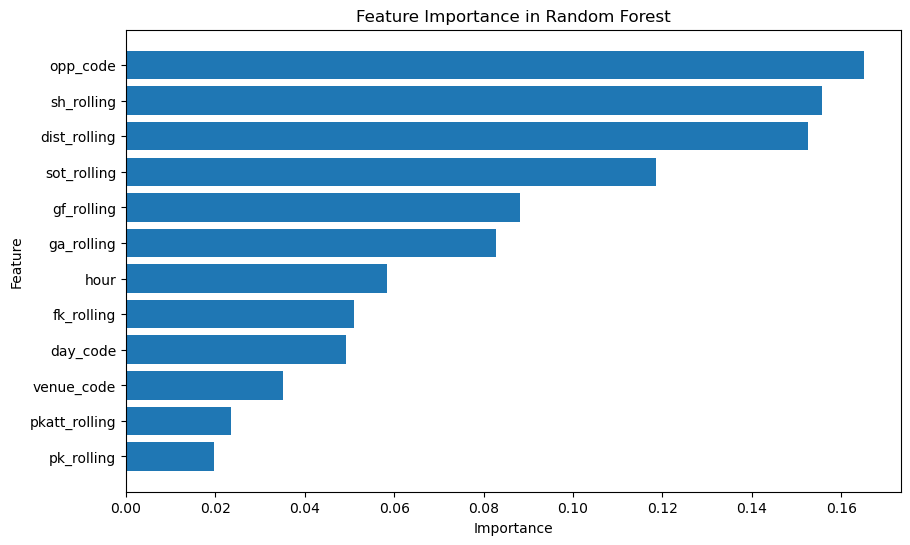

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, f1_score

# Train the Random Forest model and get predictions
combined, precision, acc, f1 = make_predictions_rf(matches_rolling, predictors + new_cols, rf)

# Get the feature importances
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': predictors + new_cols,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [74]:
predictors_without_opp_code = [col for col in predictors + new_cols if col != 'opp_code']
combined, precision, acc, f1 = make_predictions_rf(matches_rolling, predictors_without_opp_code, rf)
print(f"Precision: {precision}, Accuracy: {acc}, F1 Score: {f1}")
#Without the opp_code as a predictor all our metrics drop 

Precision: 0.5782747603833865, Accuracy: 0.6506329113924051, F1 Score: 0.46649484536082475
